# Docetaxel Data Analysis

In this analysis, the physical behaviours of cells will be explored before and after being treated with the chemotherapy drug Docetaxel.


In [1]:
import pandas as pd
import numpy as np
import trackpy as tp
pd.set_option("display.max_columns", 100)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

## Data

This data has been collected over a period of 72 hours which tracks several physical features about each cell being observed. The data was extracted using an advanced microscope which observes the cells label free and with minimal light.

Each row in the data shows the values of a particular cell (Tracking ID), and the physical features at that moment in time.

# Untreated Cell Data

Firstly, let's explore the behaviours of cells in a control environment.

In [2]:
untreated_data = pd.read_csv("A1 Untreated Data Full Feature Table.csv", skiprows=1) #Load in the data

In [3]:
untreated_data.head() #Looking at how the data is formatted

Frame  Untracked  Tracking ID  Lineage ID  Position X (µm)  \
0      1          1            1           1        49.174442   
1      2          1            1           1        36.070312   
2      3          1            1           1        29.788872   
3      1          1            2           2        51.185600   
4      2          1            2           2        36.401863   

   Position Y (µm)  Pixel Position X (Pixels)  Pixel Position Y (pixels)  \
0       379.998047                  39.052742                 301.782074   
1       385.615326                  28.645866                 306.243134   
2       389.604187                  23.657352                 309.410950   
3       190.552795                  40.649937                 151.330826   
4       197.055008                  28.909174                 156.494675   

   Volume (µm³)  Mean Thickness (µm)  Radius (µm)   Area (µm²)  Sphericity ()  \
0   9414.899414             2.254351    36.460354  4176.299316       0.254842   
1   9516.359375             2.565824    34.358017  3708.566406       0.288412   
2   9908.859375             2.324801    36.832195  4261.918457       0.256162   
3   2440.347900             0.783672    31.483553  3113.990723       0.139097   
4   2865.164795             0.870875    32.361008  3289.985107       0.146647   

   Length (µm)  Width (µm)  Orientation (°)  Dry Mass (pg)  Displacement (µm)  \
0    97.762001   62.753784       -75.650673    2353.722656           0.000000   
1   102.882668   49.756924        86.347778    2379.083252          14.257350   
2   122.062538   65.369087        79.824493    2477.212158          21.635117   
3    83.526649   56.011303        69.904770     610.086304           0.000000   
4   101.346649   61.036469        88.939087     716.290222          16.150469   

   Instantaneous Velocity (µm/s)  Instantaneous Velocity X (µm/s)  \
0                       0.039534                        -0.036336   
1                       0.029993                        -0.026874   
2                       0.020627                        -0.017413   
3                       0.044783                        -0.040993   
4                       0.027190                        -0.024517   

   Instantaneous Velocity Y (µm/s)  Track Length (µm)  
0                         0.015576           0.000000  
1                         0.013317          14.257350  
2                         0.011057          21.698286  
3                         0.018030           0.000000  
4                         0.011757          16.150469

In [4]:
untreated_data.dropna(inplace=True) #Removed rows with missing values

0.01% of the data was removed after removing rows.

Summary statistics were produced to summarise each cell (Tracking ID) for all observations over the 72 hour period. The mean for each feature was taken for each tracking ID

In [5]:
#Summarising each cell by taking the mean.
cell_untreated_data = untreated_data.groupby("Tracking ID").mean()
cell_untreated_data.head()

Frame  Untracked  Lineage ID  Position X (µm)  Position Y (µm)  \
Tracking ID                                                                   
1              2.0        1.0         1.0        38.344542       385.072520   
2              2.0        1.0         2.0        40.362910       195.547053   
3              4.5        1.0         3.0        52.362912       381.978233   
4              4.0        1.0         4.0        61.967749        80.687390   
5              4.0        1.0         5.0        61.269658       334.960667   

             Pixel Position X (Pixels)  Pixel Position Y (pixels)  \
Tracking ID                                                         
1                            30.451987                 305.812052   
2                            32.054909                 155.297104   
3                            41.584921                 303.354679   
4                            49.212769                  64.079298   
5                            48.658367                 266.014853   

             Volume (µm³)  Mean Thickness (µm)  Radius (µm)   Area (µm²)  \
Tracking ID                                                                
1             9613.372721             2.381659    35.883522  4048.928060   
2             2755.429932             0.846236    32.164270  3250.875326   
3             1956.627884             1.352436    21.659914  1489.808403   
4             1904.397775             1.131289    23.255741  1705.356184   
5             2232.404122             1.416029    22.497708  1595.274763   

             Sphericity ()  Length (µm)  Width (µm)  Orientation (°)  \
Tracking ID                                                            
1                 0.266472   107.569069   59.293265        30.173866   
2                 0.144351    96.023061   59.075063        82.703112   
3                 0.256209    57.784585   37.341533       -35.711878   
4                 0.217595    61.798286   42.668522        29.425441   
5                 0.257582    63.047226   35.036422       -18.171890   

             Dry Mass (pg)  Displacement (µm)  Instantaneous Velocity (µm/s)  \
Tracking ID                                                                    
1              2403.339355          11.964156                       0.030051   
2               688.856873          11.921036                       0.027235   
3               489.156494          44.883703                       0.036729   
4               476.099021          38.823048                       0.035742   
5               558.100507          40.655913                       0.036612   

             Instantaneous Velocity X (µm/s)  Instantaneous Velocity Y (µm/s)  \
Tracking ID                                                                     
1                                  -0.026874                         0.013317   
2                                  -0.024517                         0.011757   
3                                  -0.022395                        -0.028211   
4                                  -0.031136                         0.013049   
5                                  -0.028857                        -0.019448   

             Track Length (µm)  
Tracking ID                     
1                    11.985212  
2                    11.937322  
3                    45.936939  
4                    40.227244  
5                    42.366567

This shows a single value for each feature and for each cell. Doing this made sure only one cell was shown in visualisations. However the change in physical properties of the cell over time is lost.

In [6]:
attribs = ["Volume (µm³)","Mean Thickness (µm)",
           "Radius (µm)","Area (µm²)","Sphericity ()","Length (µm)","Width (µm)",
           "Dry Mass (pg)","Displacement (µm)","Instantaneous Velocity (µm/s)",
           "Instantaneous Velocity X (µm/s)","Instantaneous Velocity Y (µm/s)"]
#These are the main features that we are interested in

## Visualising the data

Let's take a look at the distributions and correlations of the main features in the data

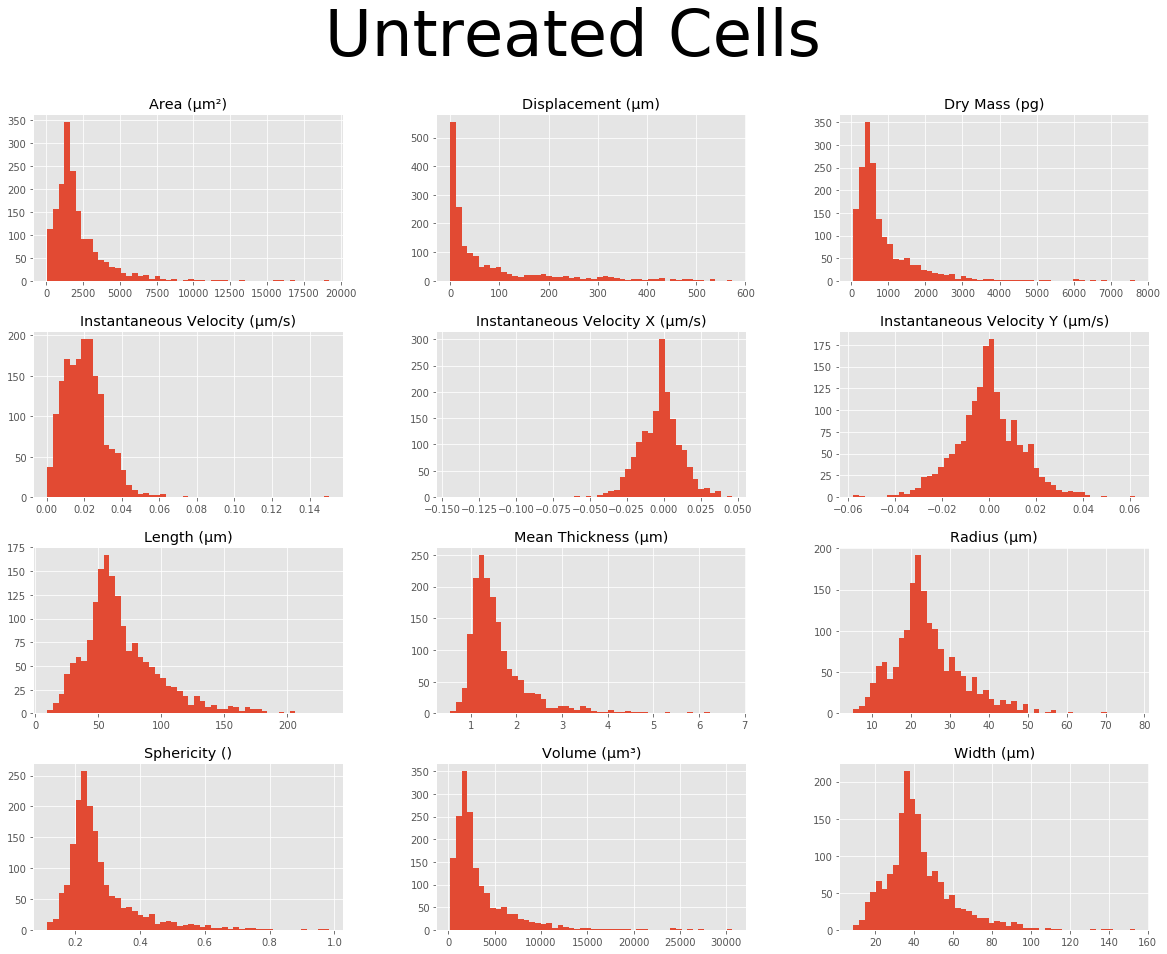

In [7]:
cell_untreated_data[attribs].hist(bins=50, figsize=(20,15))
plt.suptitle("Untreated Cells", fontsize=64)
plt.show()

In [8]:
correlation_matrix = cell_untreated_data[attribs].corr()
correlation_matrix.style.background_gradient()

When grouping each observation for each cell, time series information was lost. Let's look at how the cells moved overtime as well as how each feature of the cells changed.

## Cell Trajectories

In [9]:
def trackpy_ready(dataset):
    data_ready = dataset.rename(index=str, columns={"Tracking ID": "particle",
                                       "Frame": "frame", "Position X (µm)": "x",
                                       "Position Y (µm)": "y"})
    return data_ready

In [10]:
untreated_ready = trackpy_ready(untreated_data)

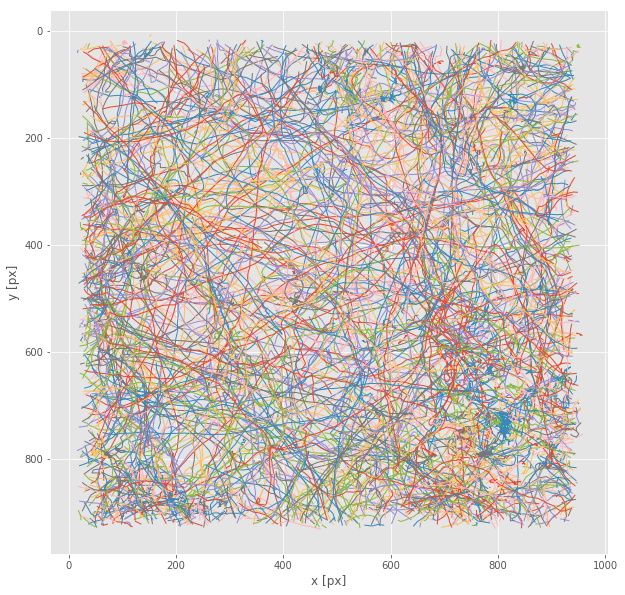

In [11]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
tp.plot_traj(untreated_ready)
plt.show()
fig.savefig("untreated_cell_movement.pdf")

Each line represents the cell trajectories over a 72 hour period. This shows a large amount of movement for the cells, they move freely.

## Timeseries

Let's explore how the features of the cells change over time.

In [12]:
timeseries_features = ["Volume (µm³)", "Mean Thickness (µm)",
                       "Radius (µm)", "Area (µm²)", "Sphericity ()",
                       "Length (µm)", "Width (µm)",
                       "Orientation (°)", "Dry Mass (pg)",
                       "Displacement (µm)", "Instantaneous Velocity (µm/s)"]

In [13]:
def feature_timeseries(df, name, feature=None, num_cells=None,):
    """
    df : Dataframe containing the time series for each cell.
    name : What you wish the figure to be saved as.
    feature :
    - None : All features are displayed.
    - String : The feature in the Dataframe you wish to observe.
    num_cells :
    - None : Displays all cells.
    - int : Specific Tracking ID observation.
    - list : Set of Tracking ID's being observed.
    
    --------------------------
    
    Plots the time series for each cell.
    """
    
    tracking_id_list = df["Tracking ID"].unique()
    tracking_id_list.sort()
  
    if type(num_cells) == int:
        tracking_id_list = tracking_id_list[:num_cells]
    elif type(num_cells) == list:
        tracking_id_list = list(set(tracking_id_list).intersection(num_cells))
    elif num_cells is None:
        num_cells = len(tracking_id_list)
          
    if feature is not None:
        fig = plt.figure(figsize=(20,10))
        for tracking_id in tracking_id_list:
        
            tracking_id_df = df.loc[df["Tracking ID"] == tracking_id]
        
            plt.plot(tracking_id_df["Frame"],tracking_id_df[feature])
            plt.annotate(str(tracking_id), xy=(float(tracking_id_df["Frame"].iloc[-1]),
                                           float(tracking_id_df[feature].iloc[-1])))
        plt.xlabel("Frame Number")
        plt.ylabel("{}".format(feature))
        plt.show()
        fig.savefig("{}.pdf".format(name))
    elif feature is None:
        fig, ax = plt.subplots(6, 2, figsize=(25,50))
        
        for feature in timeseries_features:
            
            for tracking_id in tracking_id_list:
                tracking_id_df = df[["Tracking ID", feature]]
                tracking_id_df = df.loc[df["Tracking ID"] == tracking_id]
        
                ax[timeseries_features.index(feature)//2] \
            [timeseries_features.index(feature)%2].plot(tracking_id_df["Frame"],tracking_id_df[feature])
                ax[timeseries_features.index(feature)//2] \
                [timeseries_features.index(feature)%2].annotate(str(tracking_id), 
                                                                xy=(float(tracking_id_df["Frame"].iloc[-1]),
                                           float(tracking_id_df[feature].iloc[-1])))
                ax[timeseries_features.index(feature)//2] \
                [timeseries_features.index(feature)%2].set_xlabel("Frame Number")
                ax[timeseries_features.index(feature)//2] \
                [timeseries_features.index(feature)%2].set_ylabel("{}".format(feature))
        plt.show()

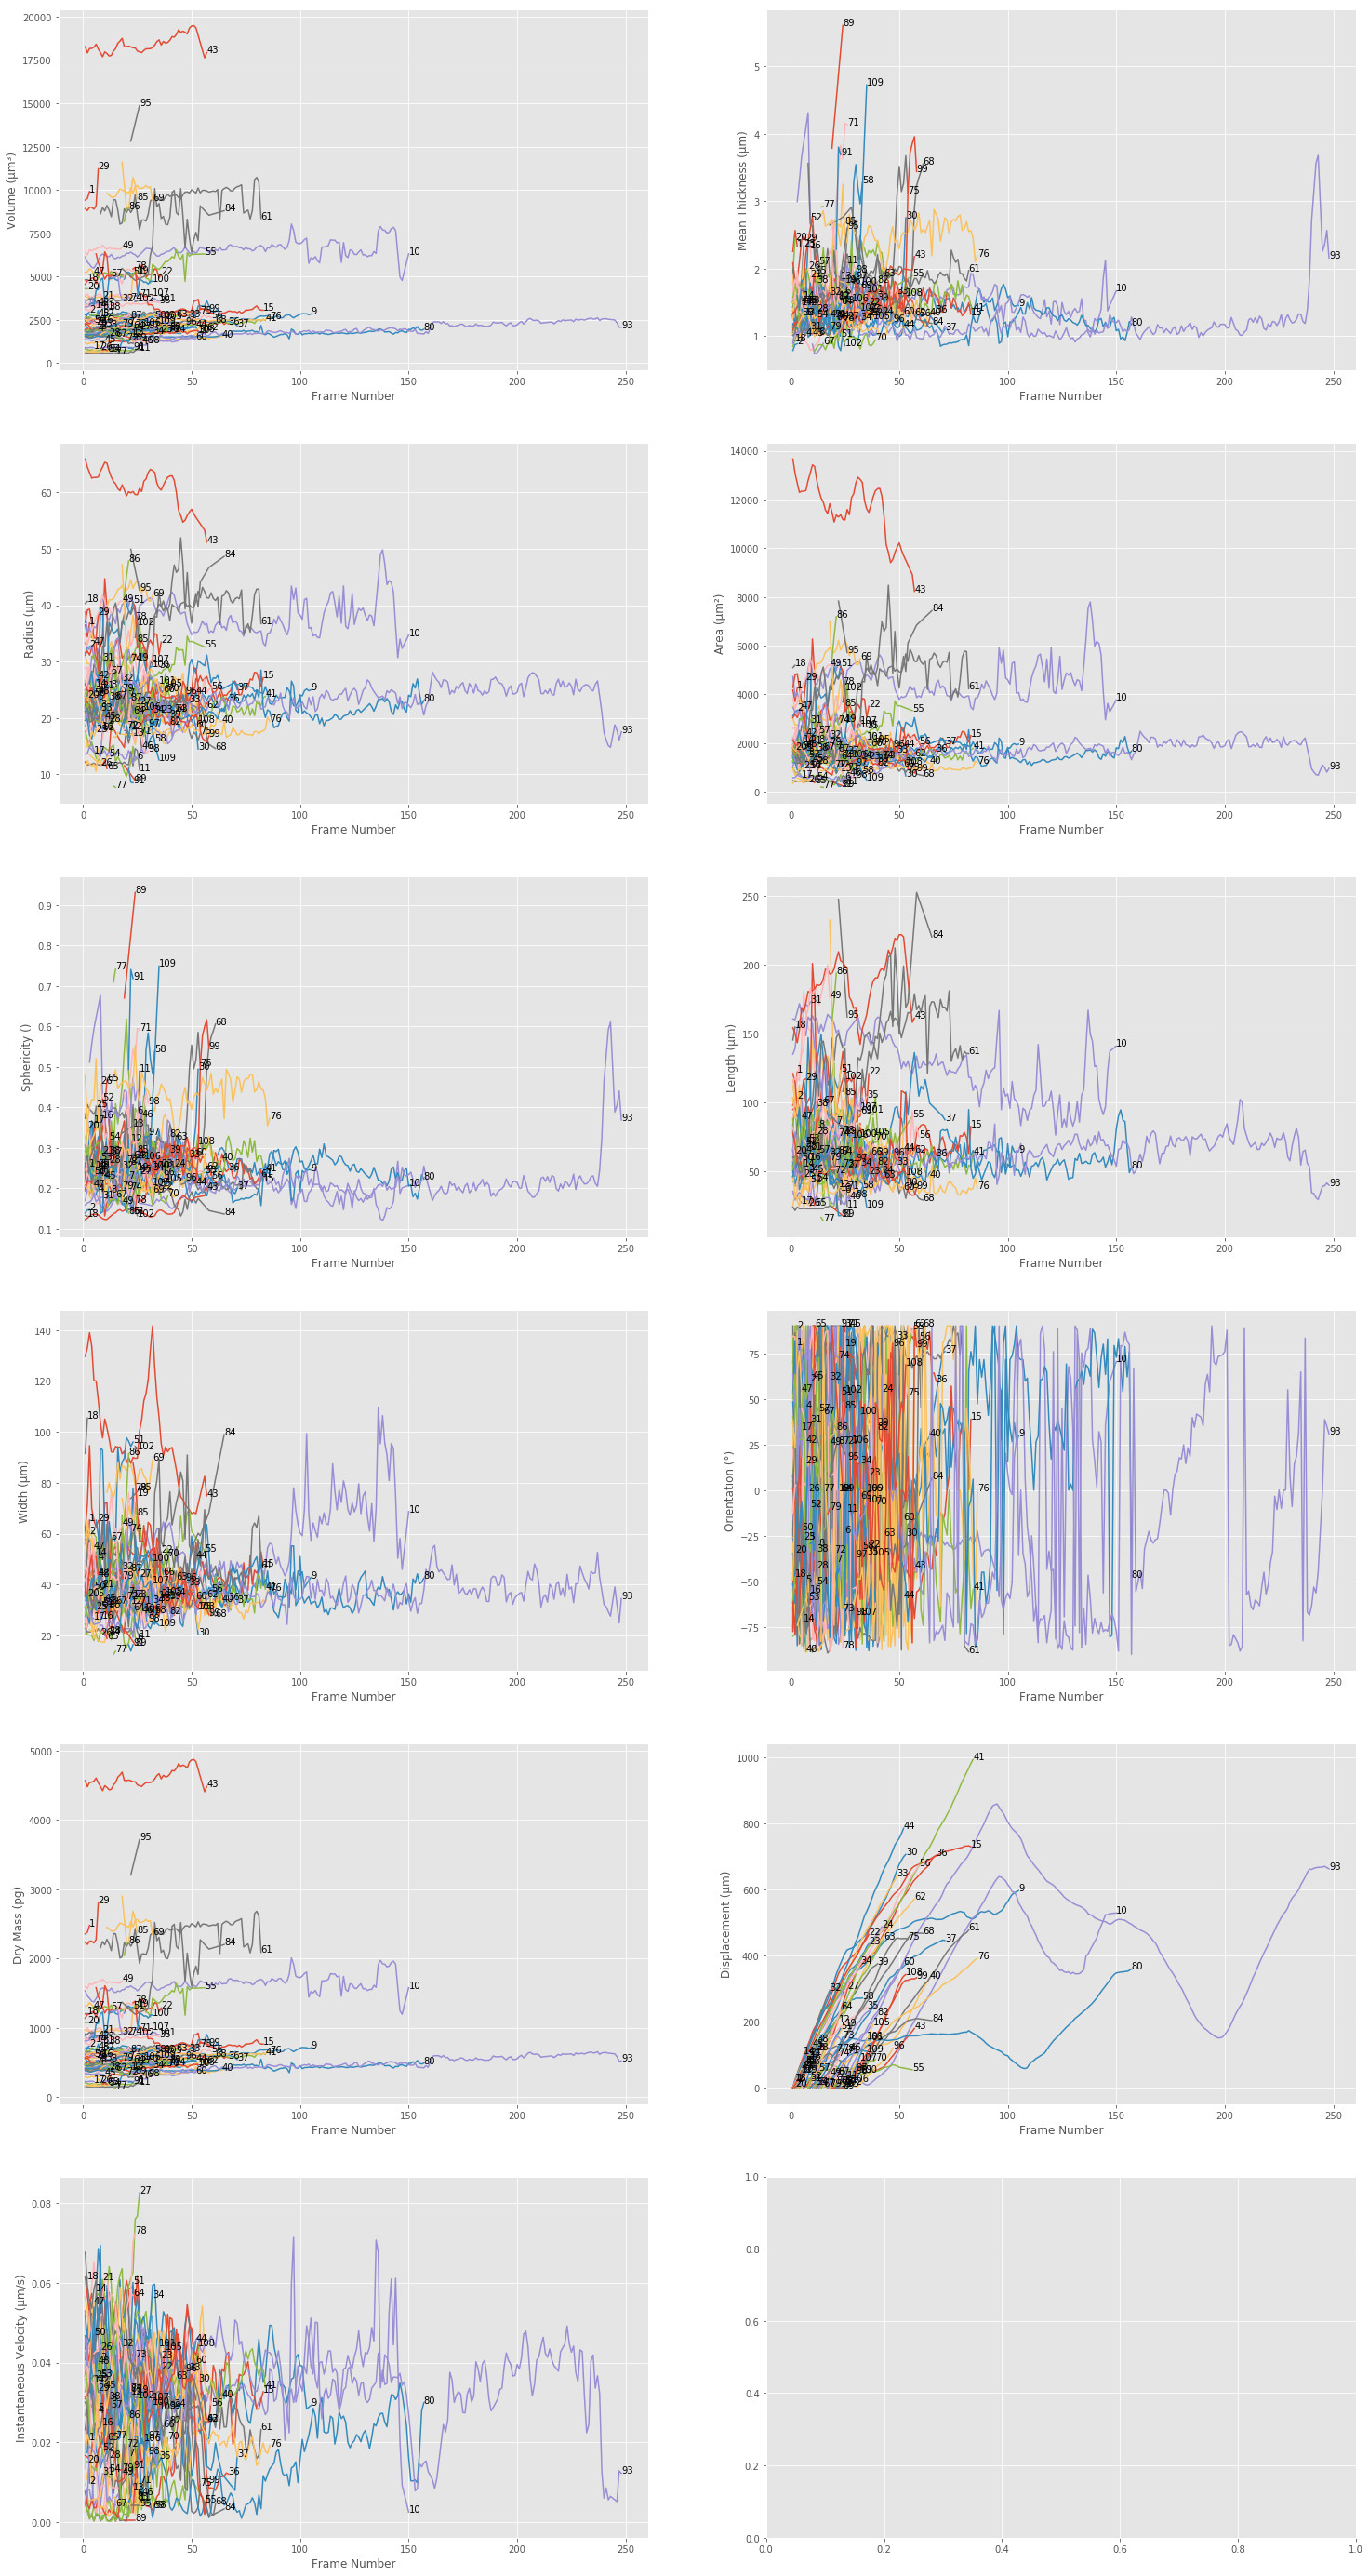

In [14]:
feature_timeseries(untreated_data, "Untreated", num_cells=100)

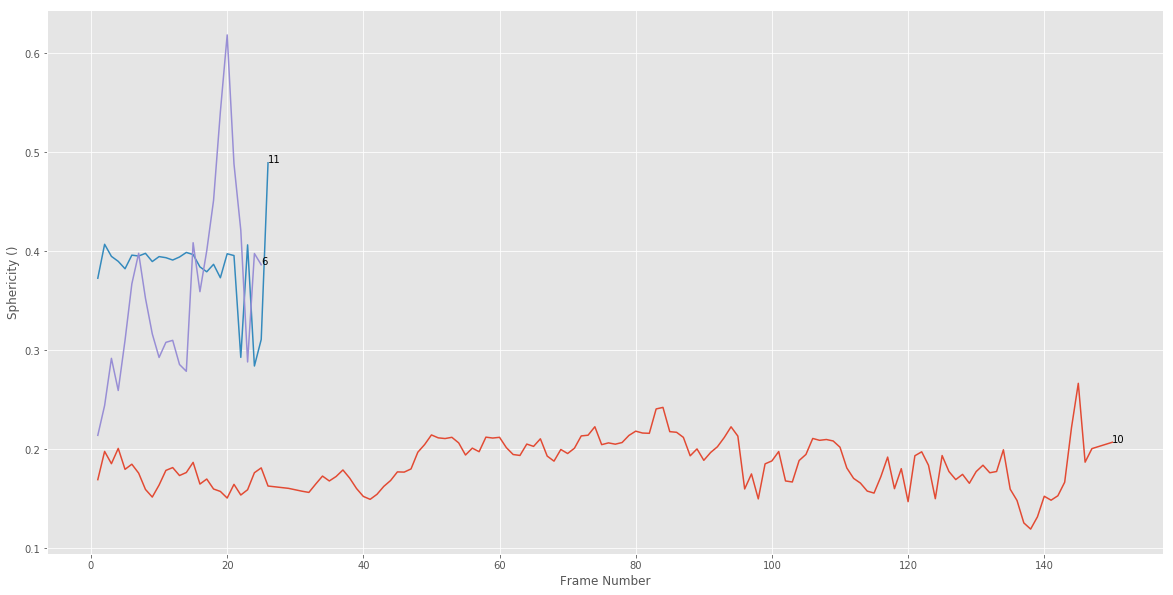

In [15]:
feature_timeseries(untreated_data,"untreated_sphericity", "Sphericity ()", num_cells=[10,6,11])

# Treated Cells

Now let's analyse how the cells behave after being treated with the chemotherapy drug Docetaxel.

In [16]:
treated_data = pd.read_csv("A2 Treated Data Full Feature Table.csv", skiprows=1) # Read in the data

Remove all the rows where there are missing values.

In [17]:
#Removing missing values
treated_data.dropna(inplace=True)

In [18]:
#Grouping by the Tracking ID and taking the mean.
cell_treated_data = treated_data.groupby("Tracking ID").mean()

## Visualising the data

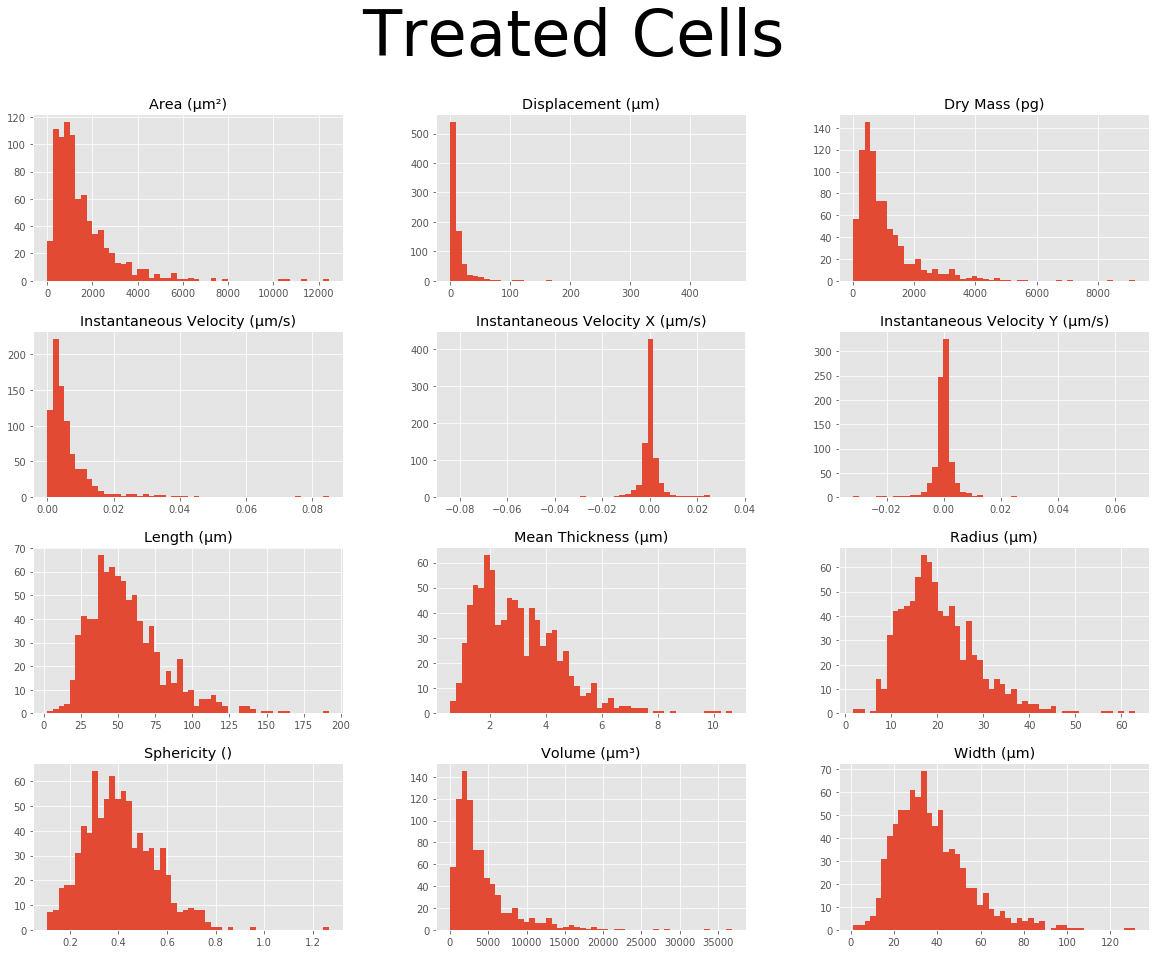

In [19]:
cell_treated_data[attribs].hist(bins=50, figsize=(20,15))
plt.suptitle("Treated Cells", fontsize=64)
plt.show()

## Cell Trajectories

In [20]:
treated_ready = trackpy_ready(treated_data)

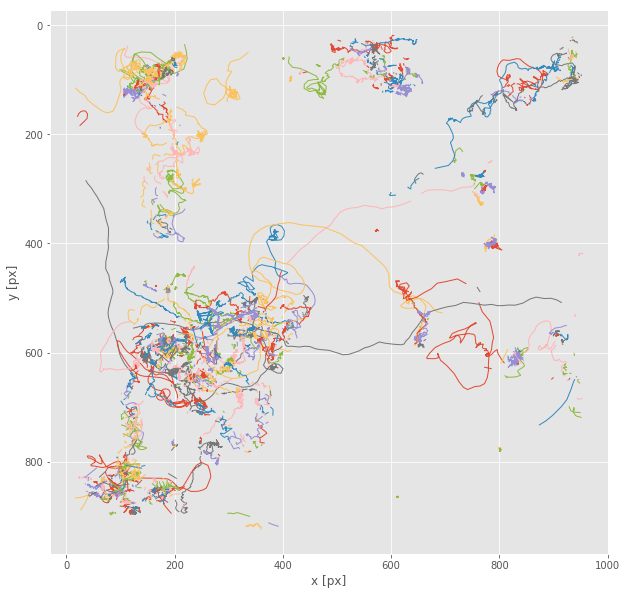

In [21]:
fig = plt.figure(figsize=(10,10))
tp.plot_traj(treated_ready)
fig.savefig("treated_cell_movement.pdf")

There is considerably less movement for the cells after they have been treated with Docetaxel.

## Timeseries

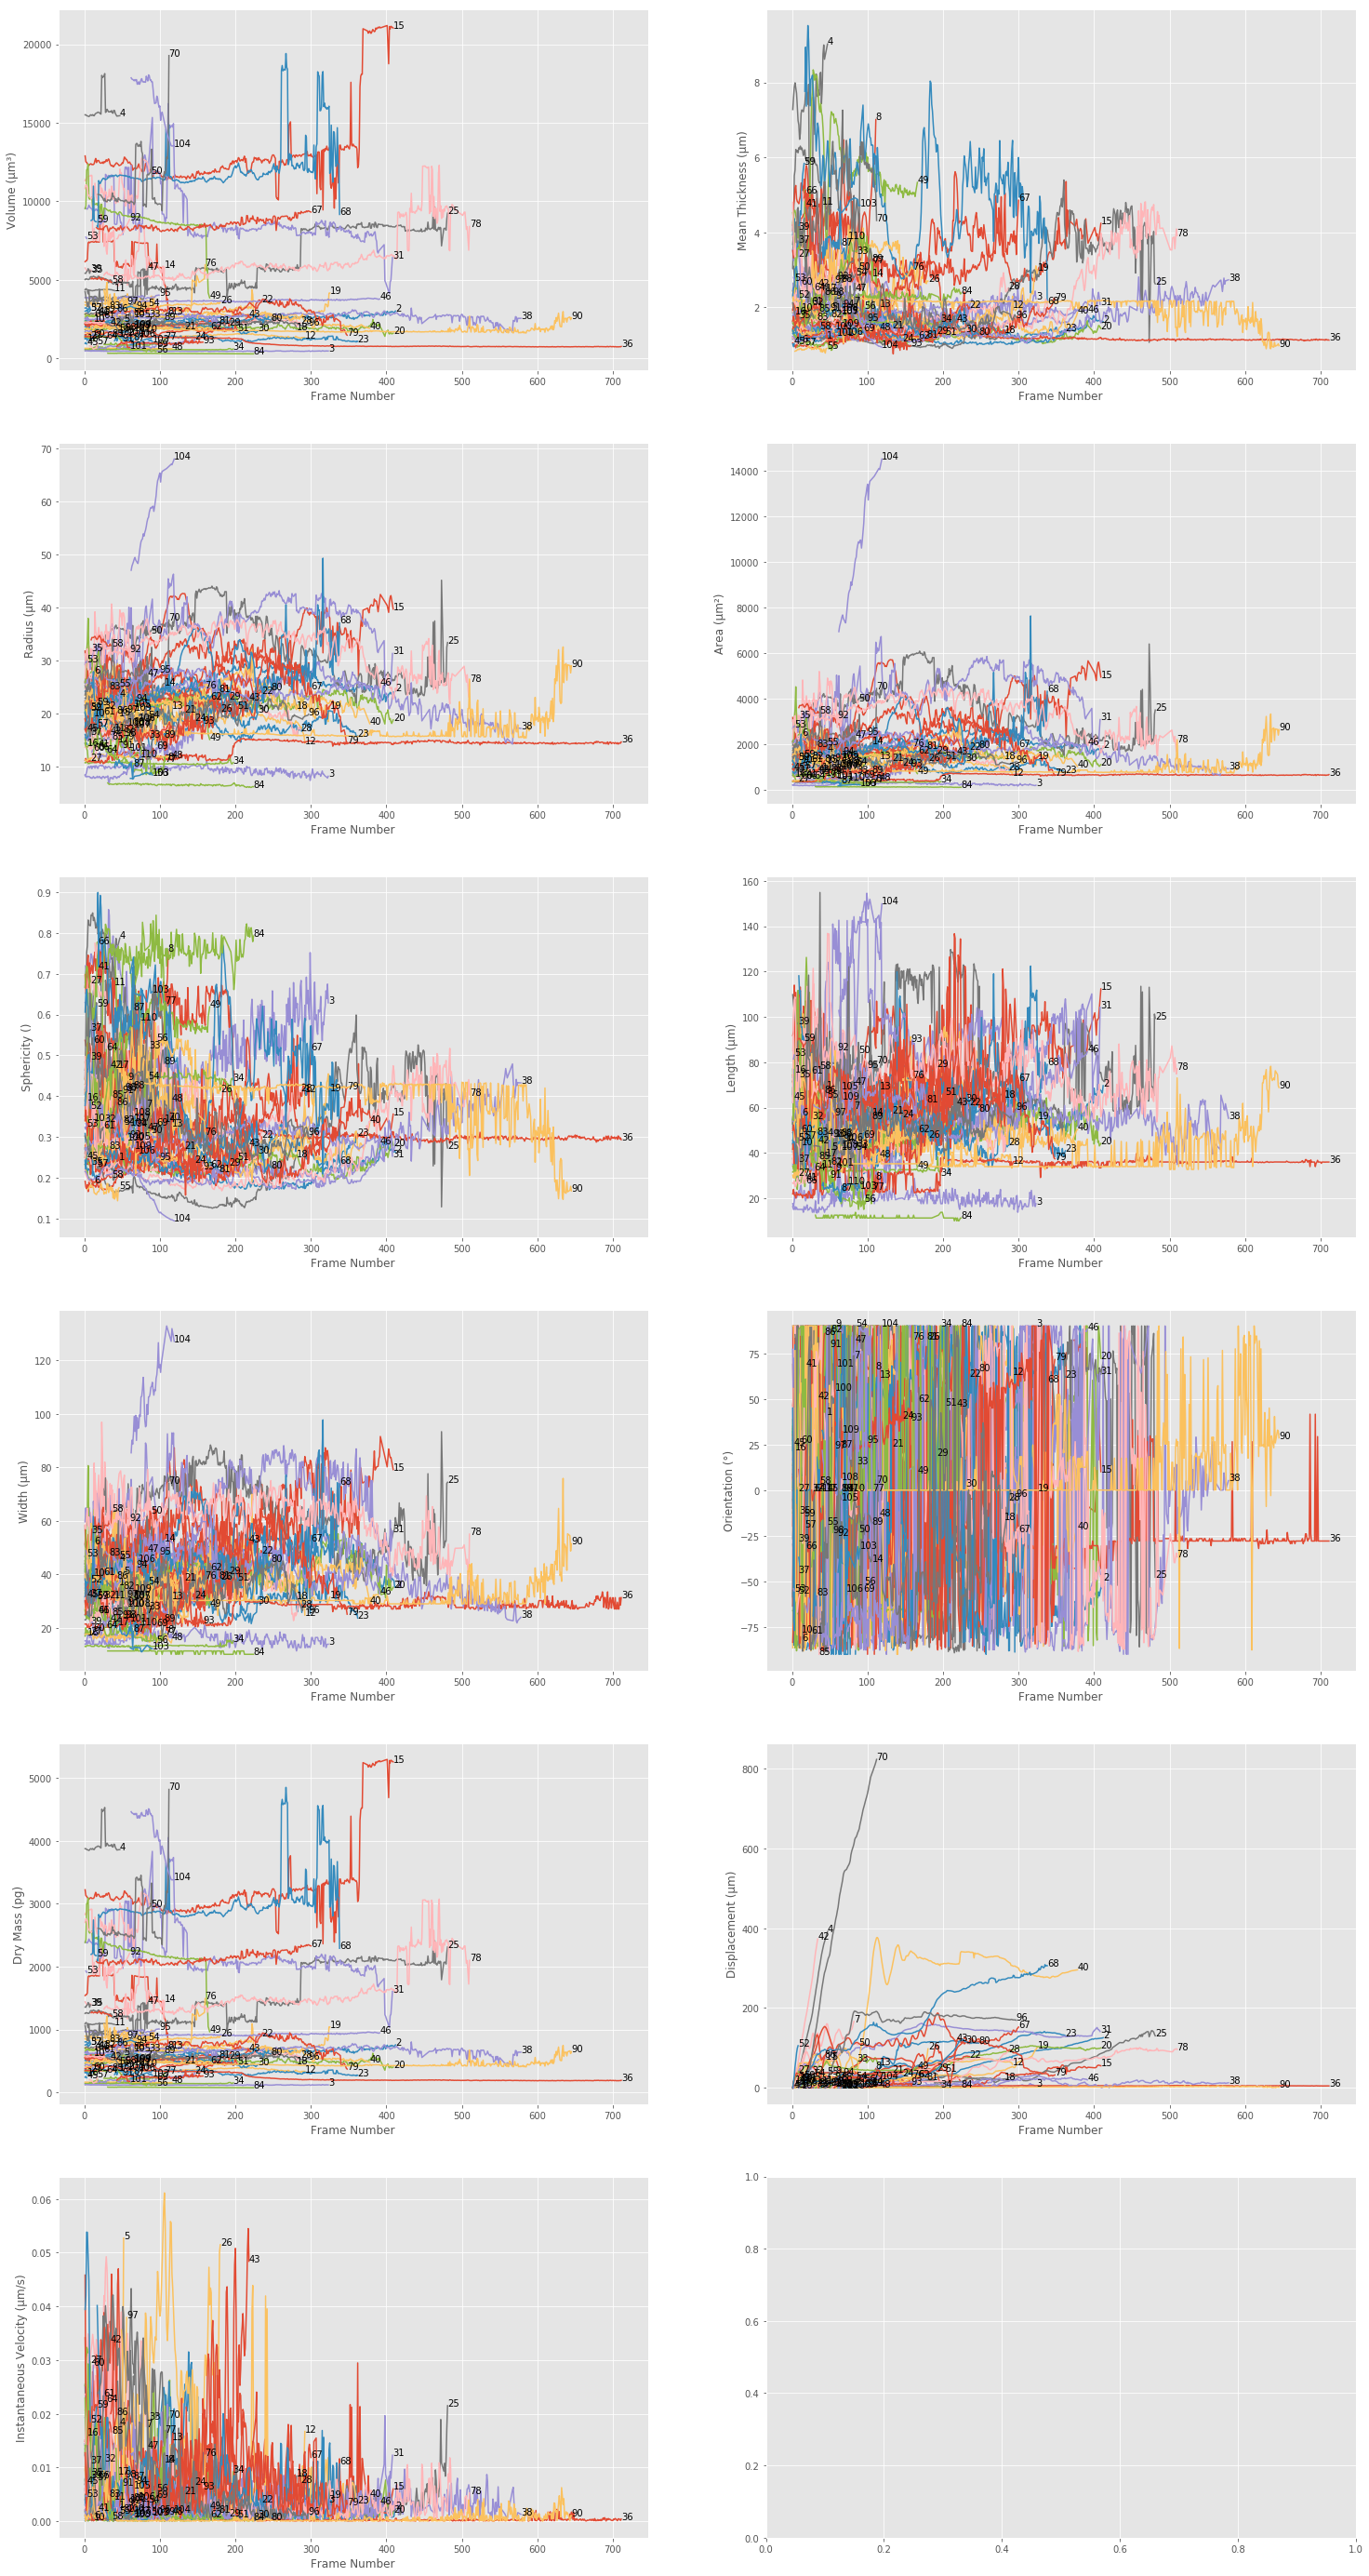

In [22]:
feature_timeseries(treated_data, "Treated", num_cells=100)

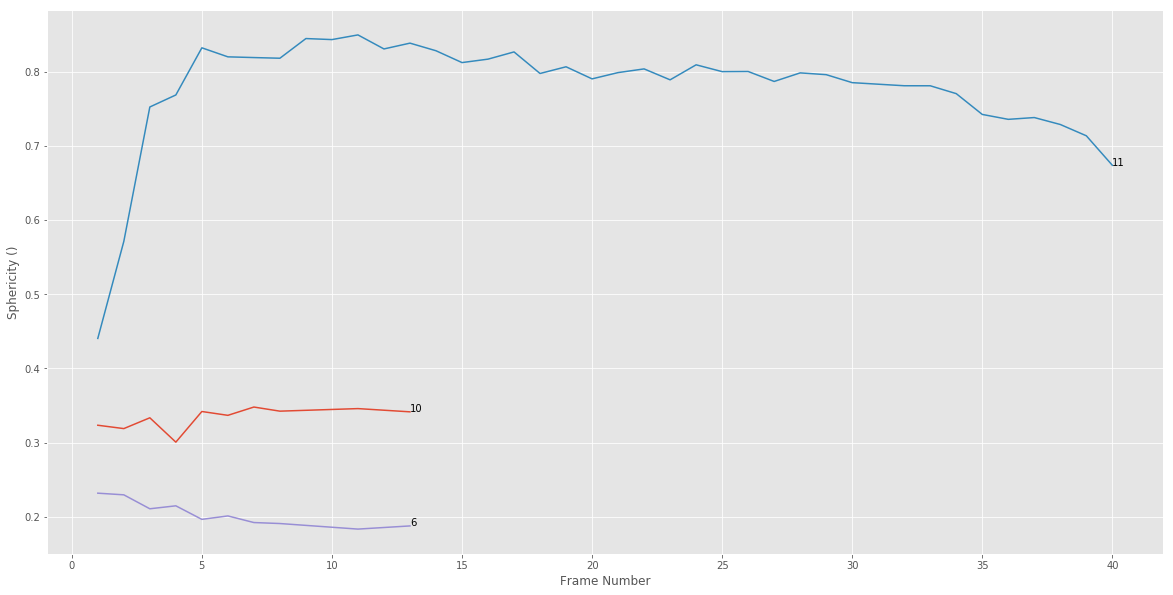

In [23]:
feature_timeseries(treated_data, "Treated_sphericity", "Sphericity ()", num_cells=[10, 6, 11])

The cells treated with Docetaxel and observed for long periods. This is due to the slow movement of the cell, meaning they are observed longer by the advanced microscope.

# Comparing Between the Control and Treated Cells

Let's compare the behaviours of cells before and after being treated with Docetaxel.

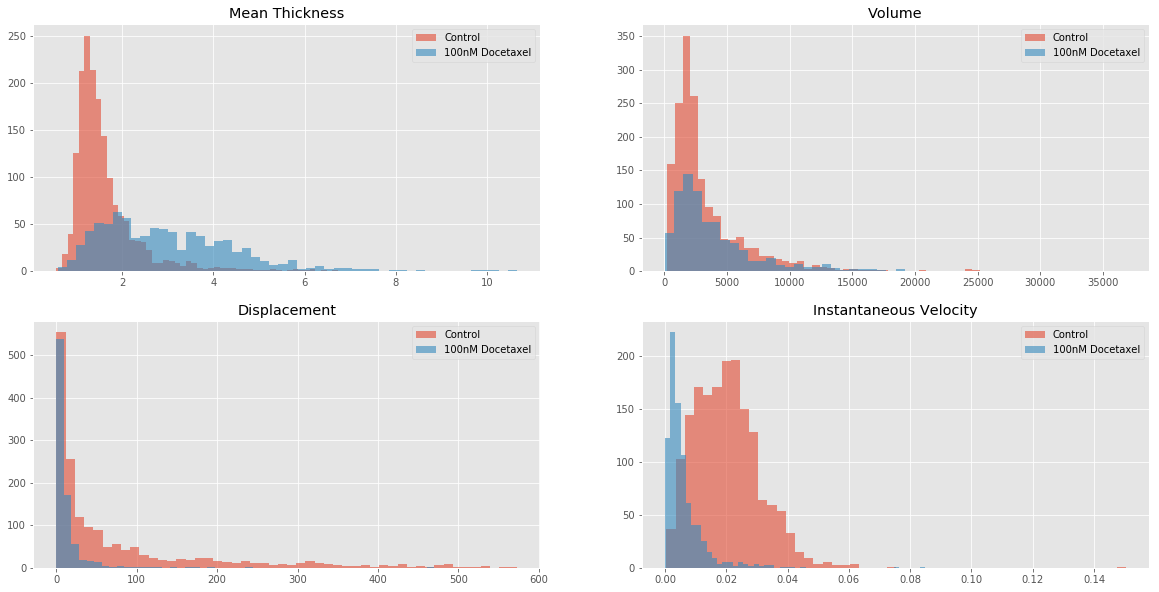

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0][0].hist(cell_untreated_data["Mean Thickness (µm)"], bins=50, alpha=0.6, label="Control")
ax[0][0].hist(cell_treated_data["Mean Thickness (µm)"], bins=50, alpha=0.6, label="100nM Docetaxel")
ax[0][1].hist(cell_untreated_data["Volume (µm³)"], bins=50, alpha=0.6, label="Control")
ax[0][1].hist(cell_treated_data["Volume (µm³)"], bins=50, alpha=0.6, label="100nM Docetaxel")
ax[1][0].hist(cell_untreated_data["Displacement (µm)"], bins=50, alpha=0.6, label="Control")
ax[1][0].hist(cell_treated_data["Displacement (µm)"], bins=50, alpha=0.6, label="100nM Docetaxel")
ax[1][1].hist(cell_untreated_data["Instantaneous Velocity (µm/s)"], bins=50, alpha=0.6, label="Control")
ax[1][1].hist(cell_treated_data["Instantaneous Velocity (µm/s)"], bins=50, alpha=0.6, label="100nM Docetaxel")

ax[0][0].set_title("Mean Thickness")
ax[0][1].set_title("Volume")
ax[1][0].set_title("Displacement")
ax[1][1].set_title("Instantaneous Velocity")

ax[0][0].legend(loc="best")
ax[0][1].legend(loc="best")
ax[1][0].legend(loc="best")
ax[1][1].legend(loc="best")
plt.show()
fig.savefig("Docetaxel_hist_comp.pdf")

In these histograms, we are plotting the distributions of 4 features for control cells (cells which haven't been treated) as well as the cells treated with 100nM of Docetaxel.

It is clear here that there is a large difference in the distributions for the 4 features. This means there is a big diffence in cell behaviour after the cells have been treated. This is really good to see as it means these can easily be classified when creating a model.

In [25]:
#Creating dictionaries for boxplot comparison
thickness_dic = {"Control Mean Thickness" : cell_untreated_data["Mean Thickness (µm)"],
               "100nM Docetaxel Mean Thickness" : cell_treated_data["Mean Thickness (µm)"]}

sphericity_dic = {"Control Sphericity" : cell_untreated_data["Sphericity ()"],
               "100nM Docetaxel Sphericity" : cell_treated_data["Sphericity ()"]}

displacement_dic = {"Control Displacement" : cell_untreated_data["Displacement (µm)"],
               "100nM Docetaxel Displacment" : cell_treated_data["Displacement (µm)"]}

velocity_dic = {"Control Instantaneous Velocity" : cell_untreated_data["Instantaneous Velocity (µm/s)"],
               "100nM Docetaxel Instantaneous Velocity" : cell_treated_data["Instantaneous Velocity (µm/s)"]}

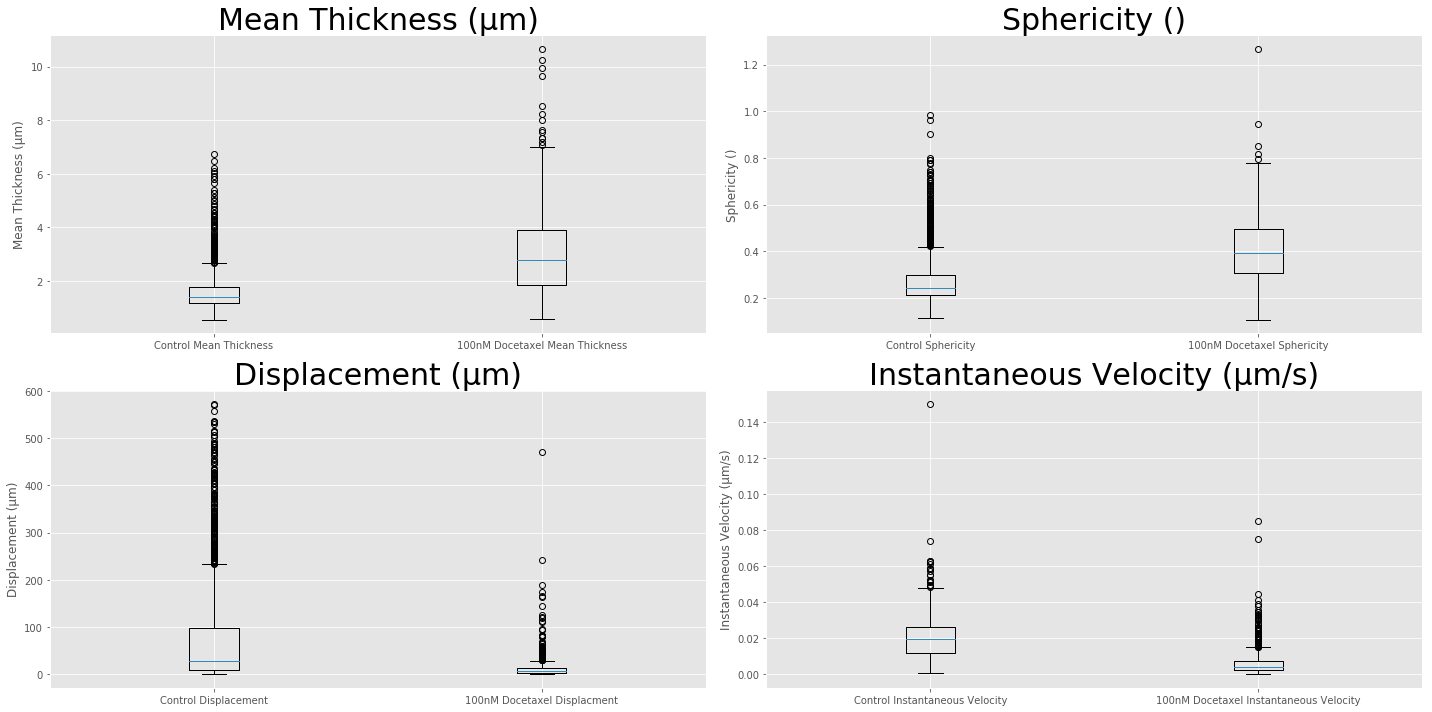

In [26]:
fig, ax = plt.subplots(2,2, figsize=(20,10))
#Mean Thickness boxplot
ax[0][0].boxplot(thickness_dic.values())
ax[0][0].set_xticklabels(thickness_dic.keys())
ax[0][0].set_title("Mean Thickness (µm)", fontsize=30)
ax[0][0].set_ylabel("Mean Thickness (µm)")

#Sphericity boxplot
ax[0][1].boxplot(sphericity_dic.values())
ax[0][1].set_xticklabels(sphericity_dic.keys())
ax[0][1].set_title("Sphericity ()", fontsize=30)
ax[0][1].set_ylabel("Sphericity ()")

#Displacement boxplot
ax[1][0].boxplot(displacement_dic.values())
ax[1][0].set_xticklabels(displacement_dic.keys())
ax[1][0].set_title("Displacement (µm)", fontsize=30)
ax[1][0].set_ylabel("Displacement (µm)")

#Instantaneous velocity boxplot
ax[1][1].boxplot(velocity_dic.values())
ax[1][1].set_xticklabels(velocity_dic.keys())
ax[1][1].set_title("Instantaneous Velocity (µm/s)", fontsize=30)
ax[1][1].set_ylabel("Instantaneous Velocity (µm/s)")
plt.tight_layout()
plt.show()
fig.savefig("D_Boxplot_Comp.pdf")

This boxplot shows the distributions of 4 features for control cells (cells which have not been treated), and cells treated with 100nM of Docetaxel.

The mean thickness largly increases after being treated, as well as the sphericity of the cells. This suggests that after the cells have been treated, they go from being flat to ball-like. 

The instantaneous velocity of the cells decreased after being treated with Docetaxel, we saw this in the cell trajectories plotted above. As the velocity of the cells decreased we would expect the displacement of the cells to also decrease, we see this in the displacement boxplot above.

## Principal Component Analysis

We have already seen there is a large difference between the movement of the cells after being treated with the Docetaxel drug, let's use PCA to observe the greatest split between the two classes in the data sets.

In [27]:
#Labelling each data set.
cell_untreated_data["Label"] = "Untreated"
cell_treated_data["Label"] = "Treated"

#Grouping the two data sets together.
grouped_cells = pd.concat([cell_untreated_data, cell_treated_data], sort=False)

In [28]:
from sklearn.decomposition import PCA

pca = PCA()

cols = ["PC1", "PC2", "PC3",
        "PC4", "PC5", "PC6",
        "PC7", "PC8","PC9", 
        "PC10", "PC11", "PC12"]

# Unscaled data
pca_unscaled = pca.fit_transform(grouped_cells[attribs])
pca_data_unscaled = pd.DataFrame(pca_unscaled, columns=cols)

# Loadings of the data
unscaled_loadings = pd.DataFrame(pca.components_, columns=cols, index=attribs)

split = 1713 #Row number of where untreated data ends and treated data starts

In [29]:
import time
from itertools import combinations_with_replacement
com2d = list(combinations_with_replacement(cols,2))
com3d = list(combinations_with_replacement(cols,3))

def best_pc(data, pc1, pc2, split=1712, pc3=None):
    """
    data : The data set being analysed.
    pc1,pc2 : Allows all combinations of PC values.
    split : where the 2 classes are split.
    pc3 :
    - None : Plots 2D combinations.
    - pc3 : Plots 3D combinations.
    
    ----------------------
    
    Plots all combinations of PC's in the 2D and 3D case."""
    #Wouldn't recommend plotting for 3D as takes long time to compute
    
    if pc3 is None:
        start = time.time()
        fig, ax1 = plt.subplots(26, 3, figsize=(20, 130))
        for i in range(0,78):
            ax1[i//3][i%3].scatter(x=data[:split][com2d[i][0]],
                                   y=data[:split][com2d[i][1]], marker=".", label="Control")
            ax1[i//3][i%3].scatter(x=data[split:][com2d[i][0]],
                                   y=data[split:][com2d[i][1]], marker=".", label="100nM Docetaxel")
            ax1[i//3][i%3].set_xlabel(com2d[i][0])
            ax1[i//3][i%3].set_ylabel(com2d[i][1])
            ax1[i//3][i%3].legend(loc="best")
        end = time.time()
    if pc3 is not None:
        start = time.time()
        fig = plt.figure(figsize=(20,455))
        spec = gridspec.GridSpec(ncols=4, nrows=91, figure=fig)
        for i in range(0,364):
            ax1 = fig.add_subplot(spec[i//4,i%4], projection='3d')
            
            ax1.scatter(xs=data[:split][com3d[i][0]], ys=data[:split][com3d[i][1]],
                                  zs=data[:split][com3d[i][2]], marker=".", label="Control")
            ax1.scatter(xs=data[split:][com3d[i][0]], ys=data[split:][com3d[i][1]],
                                  zs=data[split:][com3d[i][2]], marker=".", label="100nM Docetaxel")
            ax1.set_xlabel(com3d[i][0])
            ax1.set_ylabel(com3d[i][1])
            ax1.set_zlabel(com3d[i][2])
            plt.legend(loc="best")
        end = time.time()
    print("Run time:",end-start, "seconds")
    fig.tight_layout()
    plt.show()

Run time: 1.32344651222229 seconds


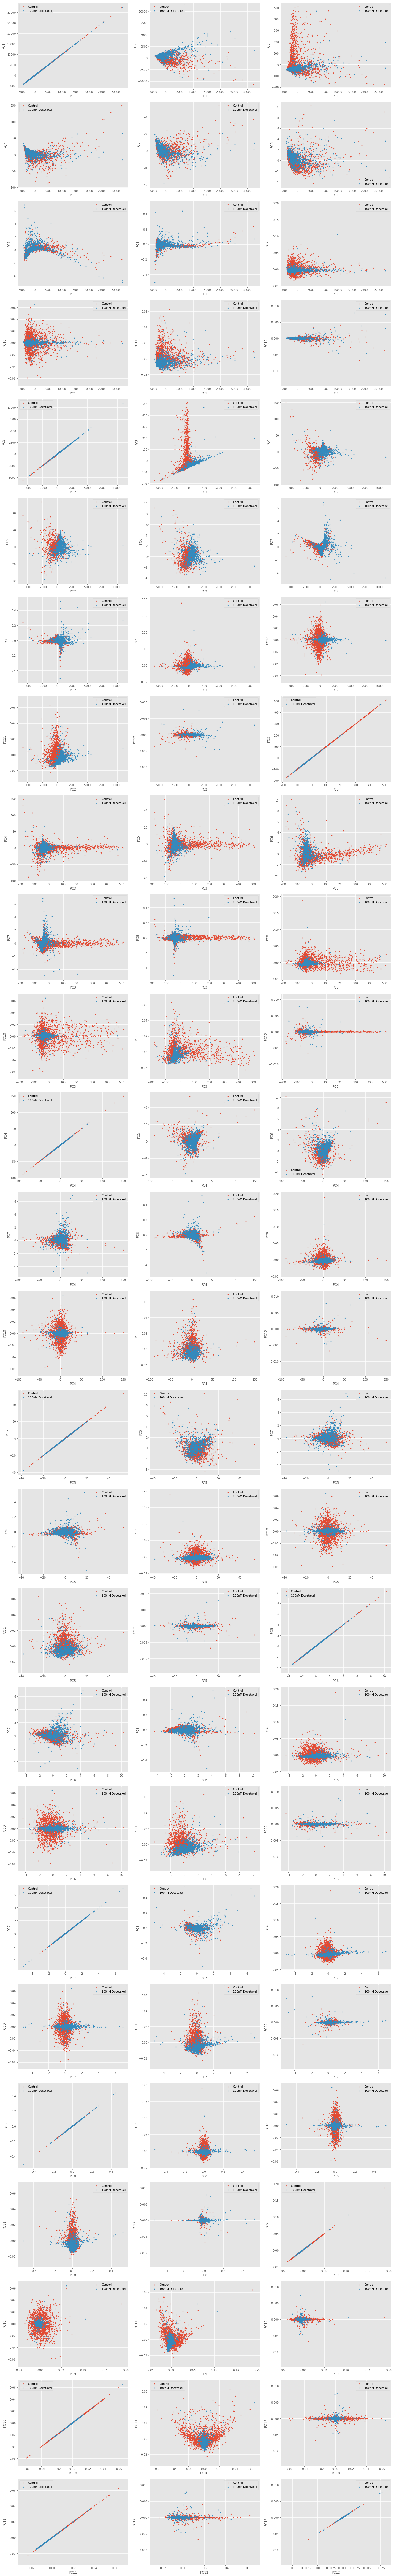

In [30]:
best_pc(pca_data_unscaled, cols, cols)

The best split is PC2 and PC3. The main separation between the classes are along PC3. Looking at the loadings for PC3 suggests that the "Length (µm)" feature strongly contributes to this split.

## The Loadings

In [31]:
unscaled_loadings

PC1       PC2       PC3           PC4  \
Volume (µm³)                     0.901254  0.000070  0.001900  3.700364e-01   
Mean Thickness (µm)              0.358954  0.000973 -0.004882 -9.285279e-01   
Radius (µm)                      0.008336 -0.001125  0.005571 -2.301520e-02   
Area (µm²)                      -0.000445  0.010154 -0.112132  1.775837e-02   
Sphericity ()                    0.000253  0.024609 -0.221589  7.849973e-03   
Length (µm)                     -0.000078  0.192021 -0.948849  1.488918e-03   
Width (µm)                      -0.000384  0.978545  0.194114  1.914878e-04   
Dry Mass (pg)                   -0.000010  0.069745 -0.016439  6.648600e-05   
Displacement (µm)                0.000317  0.001065  0.000238 -3.485586e-09   
Instantaneous Velocity (µm/s)   -0.000343 -0.000228  0.000093 -3.186867e-07   
Instantaneous Velocity X (µm/s) -0.000045  0.001136 -0.000957  2.102469e-06   
Instantaneous Velocity Y (µm/s) -0.242535  0.000054  0.000001  5.934374e-08   

                                      PC5           PC6           PC7  \
Volume (µm³)                    -0.000008  5.660573e-03  3.520070e-03   
Mean Thickness (µm)              0.000098 -1.565576e-02 -8.210006e-03   
Radius (µm)                     -0.000184  6.084374e-03 -1.519933e-03   
Area (µm²)                       0.002938 -9.887766e-01 -9.629103e-02   
Sphericity ()                    0.006155  1.197447e-01 -9.673953e-01   
Length (µm)                      0.028838  8.701726e-02  2.331883e-01   
Width (µm)                       0.065222 -9.783531e-03 -2.036461e-02   
Dry Mass (pg)                   -0.997321 -3.003429e-04 -8.432071e-04   
Displacement (µm)                0.014061 -5.563305e-06  4.084152e-06   
Instantaneous Velocity (µm/s)    0.004311  4.842802e-06 -3.699624e-06   
Instantaneous Velocity X (µm/s)  0.001607  1.565999e-05  1.747297e-04   
Instantaneous Velocity Y (µm/s)  0.000051  8.958367e-07  6.104071e-07   

                                      PC8           PC9          PC10  \
Volume (µm³)                     0.225313  4.945252e-04 -6.466389e-08   
Mean Thickness (µm)              0.089738 -2.444673e-02 -3.643760e-06   
Radius (µm)                      0.002084  9.996623e-01  4.598403e-05   
Area (µm²)                      -0.000111  6.921341e-03 -9.550198e-05   
Sphericity ()                    0.000062 -7.575562e-04 -9.829876e-05   
Length (µm)                     -0.000030  5.368862e-03 -1.263699e-03   
Width (µm)                      -0.000152  6.787557e-05 -1.772129e-03   
Dry Mass (pg)                    0.000034 -1.177397e-05  7.129417e-03   
Displacement (µm)               -0.001269 -2.433341e-05  4.195222e-01   
Instantaneous Velocity (µm/s)    0.001372 -8.559768e-07 -2.183086e-02   
Instantaneous Velocity X (µm/s)  0.000183 -3.117788e-05  9.074518e-01   
Instantaneous Velocity Y (µm/s)  0.970141 -4.809976e-08  4.078651e-04   

                                         PC11          PC12  
Volume (µm³)                     6.202257e-08 -6.542744e-08  
Mean Thickness (µm)              2.744324e-07 -1.227975e-07  
Radius (µm)                     -8.196532e-06  2.190257e-06  
Area (µm²)                      -1.054532e-05  2.931704e-06  
Sphericity ()                    1.523595e-05 -7.211090e-06  
Length (µm)                     -1.613798e-04 -1.212245e-05  
Width (µm)                       1.383695e-03 -1.746359e-04  
Dry Mass (pg)                   -1.182856e-02  4.989885e-03  
Displacement (µm)               -9.063454e-01  4.835889e-02  
Instantaneous Velocity (µm/s)    4.325240e-02  9.988153e-01  
Instantaneous Velocity X (µm/s)  4.201472e-01  1.633164e-03  
Instantaneous Velocity Y (µm/s) -1.325664e-03 -1.350018e-03

## Scores plot

This is the scores plot which shows the greatest separation between the classes

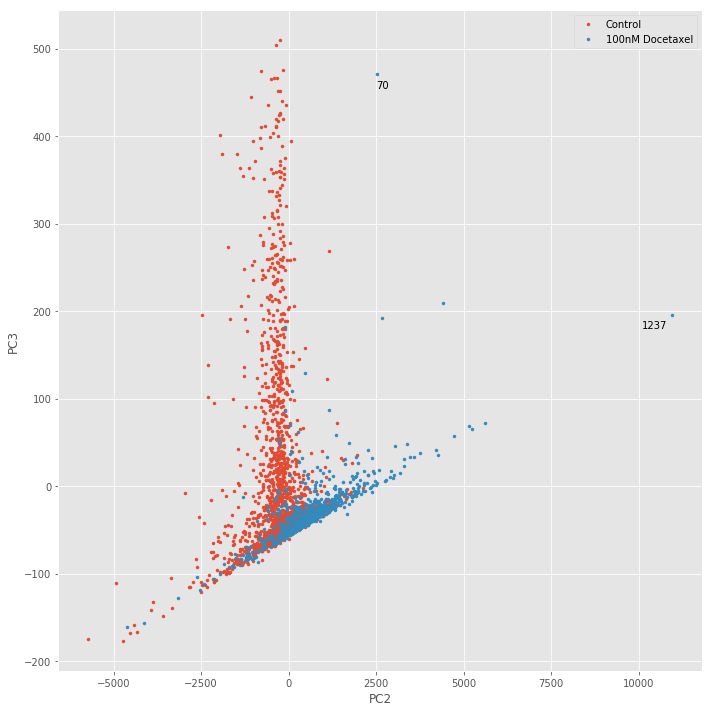

In [32]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x=pca_data_unscaled["PC2"][:split], y=pca_data_unscaled["PC3"][:split],
           marker=".", label="Control")
plt.scatter(x=pca_data_unscaled["PC2"][split:], y=pca_data_unscaled["PC3"][split:],
           marker=".", label="100nM Docetaxel")
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.tight_layout()
plt.legend(loc="best")
plt.annotate("70",xy=(2500,455))
plt.annotate("1237", xy=(10100,180))
plt.show()
fig.savefig("dbest_split.pdf")

This scores plot shows the best separation between the two classes. The numbers 70 and 1237 represent the tracking ID's for anaomalies in the data. These cells may be useful to observe and isolate to see why they are behaving so differently. These cells may be immune to the chemotherapy drug and understanding why could be extremely useful in finding new ways in curing cancer.

In [33]:
grouped_cells.to_csv("grouped_cell_data.csv")